<a href="https://colab.research.google.com/github/sgparrot/sgparrot2021Lv1-1/blob/main/simpson_Alexnet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####메소드와 데이터 확인

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import glob
import cv2
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing import image
import os
import random

In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
img_dir='/content/drive/MyDrive/simpson_train'
target=os.listdir(img_dir)
target.sort()

category={}
for i, name in enumerate(target):
    category[i]=name

print(target)
print(category)

In [ ]:
bart=glob.glob('/content/drive/MyDrive/simpson_train/bart/*.jpg')
fig = plt.figure(figsize=(10,10))
for i, path in enumerate(bart[:9]) :
    img = image.load_img(path, target_size=(250, 250))
    plt.subplot(3,3,i+1)
    plt.imshow(img)
plt.show()



#### Generating Train & Test Set

In [ ]:
X_train_list = []
y_train_list = []

for key, value in category.items():

    print(value)
    images = glob.glob("/content/drive/MyDrive/simpson_train/{0}/*.jpg".format(value))

    for image in images:
        
        image_bgr = cv2.imread(image)
        image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
        image_reshaped = cv2.resize(image_rgb, dsize=(128, 128), interpolation=cv2.INTER_AREA)

        X_train_list.append(image_reshaped)
        y_train_list.append(key)

bart
charles_montgomery
krusty
lisa_simpson
marge_simpson
milhouse_van_houten
moe_szyslak
ned_flanders
principal_skinner


In [ ]:
X_train = np.array(X_train_list)
y_train = np.array(y_train_list)

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)

X_train shape:  (11248, 128, 128, 3)
y_train shape:  (11248,)


In [ ]:
np.savez("/content/drive/MyDrive/simpson_train/train_128_npz",
         X_train_npz=X_train, y_train_npz=y_train)

In [ ]:
X_test_list = []
y_test_list = pd.read_csv("/content/drive/MyDrive/simpson_test/test_sample.csv")

In [ ]:
images = glob.glob("/content/drive/MyDrive/simpson_test/*.jpg")
images.sort()
for image in images:
        
    image_bgr = cv2.imread(image)
    image_rgb = cv2.cvtColor(image_bgr, cv2.COLOR_BGR2RGB)
    image_reshaped = cv2.resize(image_rgb, dsize=(128, 128), interpolation=cv2.INTER_AREA)

    X_test_list.append(image_reshaped)

In [ ]:
X_test = np.array(X_test_list)
y_test = np.array(y_test_list["files"])

In [ ]:
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_test shape: (1086, 128, 128, 3)
y_test shape: (1086,)


In [ ]:
np.savez("/content/drive/MyDrive/test_128_npz",
         X_test_npz=X_test, y_test_npz=y_test)

#### Data Load

In [6]:
train_dataset = np.load("/content/drive/MyDrive/train_224_npz.npz")
test_dataset = np.load("/content/drive/MyDrive/test_224_npz.npz")

In [7]:
X_train = train_dataset["X_train_npz"]
y_train = train_dataset["y_train_npz"]

y_train = to_categorical(y_train, 9)

X_test = test_dataset["X_test_npz"]
y_test_list = pd.read_csv("/content/drive/MyDrive/simpson_test/test_sample.csv")
y_test = np.array(y_test_list["files"])

In [8]:
print("X_train shape: {}".format(X_train.shape))
print("y_train shape: {}".format(y_train.shape))
print("X_test shape: {}".format(X_test.shape))
print("y_test shape: {}".format(y_test.shape))

X_train shape: (11248, 224, 224, 3)
y_train shape: (11248, 9)
X_test shape: (1086, 224, 224, 3)
y_test shape: (1086,)


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=45)
print("X_train shape: {}".format(X_train.shape))
print("X_val shape: {}".format(X_val.shape))
print("y_train shape: {}".format(y_train.shape))
print("y_val shape: {}".format(y_val.shape))

X_train shape: (8998, 224, 224, 3)
X_val shape: (2250, 224, 224, 3)
y_train shape: (8998, 9)
y_val shape: (2250, 9)


#### Defining Data Generator


In [8]:
from keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

In [9]:
train_datagen=ImageDataGenerator(
    rotation_range=15,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2
)

In [ ]:
train_datagen.fit(X_train)

##modeling

In [10]:
from tensorflow import keras
from tensorflow.keras import layers
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import GlobalAveragePooling2D
from keras.layers import Dropout
from keras.layers import BatchNormalization
from keras.layers import Activation
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.convolutional import ZeroPadding2D
from keras.optimizers import SGD
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import matplotlib.pyplot as plt
from tensorflow.keras.utils import to_categorical

In [12]:
model=Sequential()

model.add(Conv2D(96,(11,11),strides=4, input_shape=(224,224,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(BatchNormalization())

model.add(ZeroPadding2D(2))
model.add(Conv2D(256,(5,5),strides=1,activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=2))
model.add(BatchNormalization())

model.add(ZeroPadding2D(1))
model.add(Conv2D(384,(3,3), strides=1, activation='relu'))

model.add(ZeroPadding2D(1))
model.add(Conv2D(384,(3,3), strides=1, activation='relu'))

model.add(ZeroPadding2D(1))
model.add(Conv2D(256,(3,3), strides=1, activation='relu'))
model.add(MaxPooling2D(pool_size=(3,3), strides=2))

#Flatten->GlobalAveragePooling
model.add(GlobalAveragePooling2D())

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(4096, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(9, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 54, 54, 96)        34944     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 96)        0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 26, 26, 96)        384       
_________________________________________________________________
zero_padding2d_4 (ZeroPaddin (None, 30, 30, 96)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 26, 26, 256)       614656    
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 256)       0         
_________________________________________________________________
batch_normalization_3 (Batch (None, 12, 12, 256)      

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam

earlystop = EarlyStopping(monitor="val_accuracy", min_delta=0, patience=10,
                          verbose=1, mode="auto", baseline=None,
                          restore_best_weights=True)  

model.compile(optimizer='adam', loss="categorical_crossentropy",
                  metrics=["accuracy"])

## results


In [29]:
history = model.fit(X_train, y_train, batch_size = 32, validation_data=(X_val,y_val), epochs=50)

Epoch 1/50
282/282 [==============================] - 24s 86ms/step - loss: 0.0836 - accuracy: 0.9862 - val_loss: 1.2875 - val_accuracy: 0.9213
Epoch 2/50
282/282 [==============================] - 24s 85ms/step - loss: 0.0609 - accuracy: 0.9891 - val_loss: 1.1690 - val_accuracy: 0.9387
Epoch 3/50
282/282 [==============================] - 24s 85ms/step - loss: 0.0329 - accuracy: 0.9920 - val_loss: 0.9934 - val_accuracy: 0.9289
Epoch 4/50
282/282 [==============================] - 24s 85ms/step - loss: 0.0814 - accuracy: 0.9846 - val_loss: 1.0537 - val_accuracy: 0.9204
Epoch 5/50
282/282 [==============================] - 24s 85ms/step - loss: 0.0668 - accuracy: 0.9867 - val_loss: 0.8148 - val_accuracy: 0.9093
Epoch 6/50
282/282 [==============================] - 24s 85ms/step - loss: 0.0618 - accuracy: 0.9879 - val_loss: 1.3249 - val_accuracy: 0.8787
Epoch 7/50
282/282 [==============================] - 24s 85ms/step - loss: 0.1156 - accuracy: 0.9766 - val_loss: 0.6176 - val_accuracy:

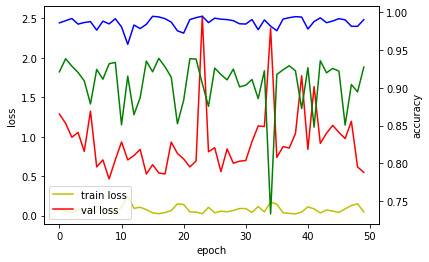

In [31]:
fig, loss_ax=plt.subplots()
acc_ax=loss_ax.twinx()
loss_ax.plot(history.history['loss'],'y',label='train loss')
loss_ax.plot(history.history['val_loss'],'r',label = 'val loss')
acc_ax.plot(history.history['accuracy'],'b',label='train acc')
acc_ax.plot(history.history['val_accuracy'], 'g', label='val_accuracy')
loss_ax.set_xlabel('epoch')
loss_ax.set_ylabel('loss')
acc_ax.set_ylabel('accuracy')
loss_ax.legend(loc='upper left')
loss_ax.legend(loc='lower left')
plt.show()

In [32]:
model.save('alexforsimpson.h5')

#### 답안

In [23]:
import io
y_test_list = pd.read_csv('/content/drive/MyDrive/test.csv',index_col=0)

In [30]:
y_test = y_test_list["pred"]
y_test

KeyError: ignored

In [ ]:
prediction = model.predict(test_loader)
predicted_labels = np.argmax(prediction, axis = 1)


print("predicted_labels example 2 :",predicted_labels[:10])

for i,label in enumerate(predicted_labels) : 
    y_test[i] = category[label]

y_test_list

In [ ]:
y_test_list.to_csv('/content/drive/MyDrive/simpson-answer/test_answer2')